##### The vast majority of wikipedia articles will lead to philosophy if you keep clicking the first link.
##### This notebook collects and analyses data on a sample of 500 random articles.
##### Find out more and read the rules at https://en.wikipedia.org/wiki/Wikipedia:Getting_to_Philosophy

In [1]:
# example of two searches
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

df = pd.DataFrame()

article_count = 0
loop = False
for search in range(2):
    article_count += 1
    print(f"Article count = {article_count}")
    response = requests.get("https://en.wikipedia.org/wiki/Special:Random")   
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all("p")
    links = []
    links.append(str(response.url))

    print(links[0][24:])

    while links[-1] != "https://en.wikipedia.org/wiki/Philosophy":
        paragraphs = str(paragraphs)
        start = 0
        stop = 0
        start_found = False
        stop_found = False
        iteration = 0
        
        # this section removes bracketed text as per the rules 
        while start != len(paragraphs):
            start = 0
            stop = 0
            start_found = False
            stop_found = False
            iteration += 1
            if iteration > 100:
                break
            while not stop_found:
                if paragraphs[start] == "]":
                    break                   
                # != "_" condition needed avoid deleting valid links like "wiki/power_(physics)"
                # because the script does not know the difference between links and other text
                # when it looks at the HTML
                faulty_text = False # this is necessary if the article has an unclosed bracket
                try:
                    if paragraphs[start] == "(" and paragraphs[start-1] != "_":
                        stop = start + 1
                        start_found = True
                        other_bracket_found = False
                        while not stop_found:
                            if paragraphs[stop] == "(":
                                other_bracket_found = True
                                while other_bracket_found:                    
                                    stop += 1
                                    if paragraphs[stop] == ")":
                                        stop += 1
                                        other_bracket_found = False
                            if paragraphs[stop] == ")":
                                stop_found = True
                                paragraphs = paragraphs[:start] + paragraphs[stop+1:]
                            else:
                                stop += 1 
                    elif not start_found:
                        start += 1
                    else:
                        paragraphs[start:stop+1] = ""
                        break
                except IndexError:
                    faulty_text = True                
                    break                    
        # this section finds and copies the first link
        if not faulty_text:
            start = 0
            stop = 6
            time_start = time.time() 
            while (time.time() - time_start) < 20: # times-out at 20 seconds
                if paragraphs[start+12:stop+12] == "#cite_": # this avoids citations
                    start += 12
                    stop += 12
                    continue
                if paragraphs[start+6:stop+5] == 'href=':
                    # this makes sure it doesn't click on a "citation needed" links,
                    # coordinates links, or IPA pronounciation links, or wiki discussion pages
                    if paragraphs[start+12:stop+17] == "/wiki/Talk:" or paragraphs[start+12:stop+22] == "/wiki/Wikipedia:" or paragraphs[start+12:stop+17] == "/wiki/File:" or paragraphs[start+12:stop+30] == "//geohack.toolforge.org/" or paragraphs[start+12:stop+37] == "/wiki/Wikipedia:Citation_needed" or paragraphs[start+12:stop+17] == "/wiki/Help:":
                        start += 1
                        stop += 1
                        continue        
                    start += 6
                    stop += 5
                    while True:
                        stop += 1
                        if paragraphs[stop] == '"':
                            start += 6
                            break            
                    break
                else:
                    start += 1
                    stop += 1     
                if time.time() - time_start > 20:
                    print("Timeout")
                    break
                
        print(paragraphs[start:stop])
        
        if faulty_text:
            print("Error: check article for unclosed brackets")
        
        invalid_link = False                                        # filters out (W/w)iktionary links
        if "/wiki/" not in paragraphs[start:stop] or faulty_text or "iktionary" in paragraphs[start:stop]:
            print("INVALID LINK")
            invalid_link = True
            break
            
        response = requests.get(f"https://en.wikipedia.org{paragraphs[start:stop]}") 
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all("p")
        
        loop = False
        if str(response.url) in links:
            print("LOOP")
            loop = True
            break
            
        links.append(str(response.url))

    print("\n")        
    for i in range(len(links)):
        links[i] = links[i][30:]
        
    if invalid_link:
        links[-1] = "*invalid link*"
    
    if loop:
        links[-1] = "*loop*"
    
    temp_df = pd.DataFrame([links])
    df = pd.concat([df, temp_df])

Article count = 1
/wiki/Akshay_H._Mehta
/wiki/Maharaja_Sayajirao_University
/wiki/Vadodara
/wiki/States_and_union_territories_of_India
/wiki/India
/wiki/South_Asia
/wiki/Subregion#Asia
/wiki/Region
/wiki/Geography
/wiki/Science
/wiki/Knowledge
/wiki/Awareness
/wiki/Philosophy


Article count = 2
/wiki/Topictoday
/wiki/Alternative_rock
/wiki/Rock_music
/wiki/Genre_(music)
/wiki/Music
/wiki/The_arts
/wiki/Creativity
/wiki/Phenomenon
/wiki/Observable
/wiki/Physics
/wiki/Natural_science
/wiki/Branches_of_science
/wiki/Sciences
/wiki/Knowledge
/wiki/Awareness
/wiki/Philosophy




In [2]:
results = pd.read_csv("results_save.csv")
results_backup = results
results.drop(columns=results.columns[0], axis=1,  inplace=True) # removes junk first column
results.columns = [x for x in range(0, len(results.columns))] # names columns in increasing number
results

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,"Holy_Trinity_Church,_Morecambe",Surrey-Panorama,Briercrest,Alap%C3%B5dra,Piero_Remor,Graham_Coughlan,Pont_del_Diable,"Kas%C4%B1ml%C4%B1,_%C5%9Eirvan",List_of_advertising_awards,"Nowy_Dw%C3%B3r,_Trzebnica_County",...,Francesco_Antonio_Altobello,Keisripalu_Nature_Reserve,USS_Edith_(ID-3459),Mure%C8%99_County,Kursi_Aur_Qanoon,Salem_and_Pennsgrove_Traction_Company,Bromus_alopecuros,Prince_Caspian,Hindenburgkanzel,Kochi_Sun_Sun_Broadcasting
1,Morecambe,Electoral_district_(Canada),Village,Village,Italians,Manager_(association_football),Medieval,%C5%9Eirvan_District,Advertising,Gmina_Trzebnica,...,Naples,Nature_reserve,United_States_Navy,Romania,Pakistani,"Salem,_New_Jersey",Bromus,High_fantasy,Bavaria,Television_network
2,Seaside_town,Constituency,Human_settlement,Human_settlement,Ethnic_group,Association_football,History_of_Europe,Siirt_Province,Branding_(promotional),Gmina,...,Regions_of_Italy,Protected_area,Naval_warfare,Europe,Pakistani_nationality_law,City_(New_Jersey),Genus,Subgenre,States_of_Germany,Telecommunications_network
3,Resort_town,State_(polity),Geography,Geography,People,Team_sport,Prehistoric_Europe,Provinces_of_Turkey,Business,Poland,...,Administrative_division,Exploitation_of_natural_resources,Combat,Continent,Coming_into_force,Local_government_in_New_Jersey,Taxonomic_rank,Communication,Federal_Republic_of_Germany,*loop*
4,Tourism,Politics,Science,Science,Person,Sport,Lower_Paleolithic,Turkey,Trade,Europe,...,Sovereign_state,Natural_resource,Violence,Geography,Law,New_Jersey,Biology,Information,Europe,NaN
5,Travel,Decision-making,Scientific_method,Scientific_method,Reason,Physical_activity,Fertile_Crescent,List_of_transcontinental_countries,System,Continent,...,State_(polity),Resource,World_Health_Organization,Science,Law_enforcement,Mid-Atlantic_States,Science,Abstraction,Continent,NaN
6,Location_(geography),Psychology,Empirical_evidence,Empirical_evidence,Logic,Exercise,Middle_East,Country,Environment_(systems),Geography,...,Politics,Technology,List_of_specialized_agencies_of_the_United_Nat...,Scientific_method,Government,List_of_regions_of_the_United_States,Scientific_method,Rule_of_inference,Geography,NaN
7,Geography,Science,Proposition,Proposition,Logical_reasoning,Human_body,Arabian_Peninsula,Earth,Science,Science,...,Decision-making,Knowledge,United_Nations,Empirical_evidence,State_(polity),United_States,Empirical_evidence,Logic,Science,NaN
8,Science,Scientific_method,Semantics,Semantics,Rigour,Human,Arabic_language,*loop*,Scientific_method,Scientific_method,...,Psychology,Awareness,Intergovernmental_organization,Proposition,Politics,Continental_United_States,Proposition,Logical_reasoning,Scientific_method,NaN
9,Scientific_method,Empirical_evidence,Reference,Reference,Famine,Species,Semitic_languages,NaN,Empirical_evidence,Empirical_evidence,...,Science,Psychology,Treaty,Semantics,Decision-making,*loop*,Semantics,Rigour,Empirical_evidence,NaN


In [3]:
# here only columns whose paths landed on Philosophy are included for the sake of the later analysis
cols_with_value = results.isin(["Philosophy"]).any()
only_philosophy = results.loc[:, cols_with_value]
only_philosophy.columns = [x for x in range(0, len(only_philosophy.columns))] # resets columns to integers after being turned to strings
only_philosophy

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,"Holy_Trinity_Church,_Morecambe",Surrey-Panorama,Briercrest,Alap%C3%B5dra,Piero_Remor,Graham_Coughlan,Pont_del_Diable,List_of_advertising_awards,"Nowy_Dw%C3%B3r,_Trzebnica_County",Oleksandr_Kucherenko,...,Coccothrinax_proctorii,Now_or_Never_(radio_show),Francesco_Antonio_Altobello,Keisripalu_Nature_Reserve,USS_Edith_(ID-3459),Mure%C8%99_County,Kursi_Aur_Qanoon,Bromus_alopecuros,Prince_Caspian,Hindenburgkanzel
1,Morecambe,Electoral_district_(Canada),Village,Village,Italians,Manager_(association_football),Medieval,Advertising,Gmina_Trzebnica,Association_football,...,Arecaceae,Radio_documentary,Naples,Nature_reserve,United_States_Navy,Romania,Pakistani,Bromus,High_fantasy,Bavaria
2,Seaside_town,Constituency,Human_settlement,Human_settlement,Ethnic_group,Association_football,History_of_Europe,Branding_(promotional),Gmina,Team_sport,...,Family_(biology),Radio_format,Regions_of_Italy,Protected_area,Naval_warfare,Europe,Pakistani_nationality_law,Genus,Subgenre,States_of_Germany
3,Resort_town,State_(polity),Geography,Geography,People,Team_sport,Prehistoric_Europe,Business,Poland,Sport,...,Taxonomic_rank,Radio_station,Administrative_division,Exploitation_of_natural_resources,Combat,Continent,Coming_into_force,Taxonomic_rank,Communication,Federal_Republic_of_Germany
4,Tourism,Politics,Science,Science,Person,Sport,Lower_Paleolithic,Trade,Europe,Physical_activity,...,Biology,Broadcasting,Sovereign_state,Natural_resource,Violence,Geography,Law,Biology,Information,Europe
5,Travel,Decision-making,Scientific_method,Scientific_method,Reason,Physical_activity,Fertile_Crescent,System,Continent,Exercise,...,Science,Distribution_(business),State_(polity),Resource,World_Health_Organization,Science,Law_enforcement,Science,Abstraction,Continent
6,Location_(geography),Psychology,Empirical_evidence,Empirical_evidence,Logic,Exercise,Middle_East,Environment_(systems),Geography,Human_body,...,Scientific_method,Value_chain,Politics,Technology,List_of_specialized_agencies_of_the_United_Nat...,Scientific_method,Government,Scientific_method,Rule_of_inference,Geography
7,Geography,Science,Proposition,Proposition,Logical_reasoning,Human_body,Arabian_Peninsula,Science,Science,Human,...,Empirical_evidence,Product_(business),Decision-making,Knowledge,United_Nations,Empirical_evidence,State_(polity),Empirical_evidence,Logic,Science
8,Science,Scientific_method,Semantics,Semantics,Rigour,Human,Arabic_language,Scientific_method,Scientific_method,Species,...,Proposition,Consumer,Psychology,Awareness,Intergovernmental_organization,Proposition,Politics,Proposition,Logical_reasoning,Scientific_method
9,Scientific_method,Empirical_evidence,Reference,Reference,Famine,Species,Semitic_languages,Empirical_evidence,Empirical_evidence,Biology,...,Semantics,Goods,Science,Psychology,Treaty,Semantics,Decision-making,Semantics,Rigour,Empirical_evidence


In [5]:
# this finds all the unique articles seen
all_articles = [article_name for column in range(len(only_philosophy.columns)) for article_name in only_philosophy[column].unique()]
uniques = list(set(all_articles))
uniques_counts = [all_articles.count(i) for i in uniques]
df0 = pd.DataFrame(uniques,columns=["Articles seen"])
df1 = pd.DataFrame(uniques_counts,columns=["Counts"])
article_counts = pd.concat([df0,df1],axis=1)
article_counts.dropna(inplace=True)
article_counts.sort_values(by=["Counts"],ascending=False,inplace=True)
article_counts.head(10)

,Articles seen,Counts
391,Philosophy,428
568,Semantics,427
140,Reference,427
1336,Object_(philosophy),427
1407,Empirical_evidence,426
1522,Proposition,426
286,Scientific_method,425
1427,Science,353
1174,Psychology,117
1188,Biology,97


In [6]:
print(f"Total unique articles visited: {len(uniques)}")

Total unique articles visited: 1587


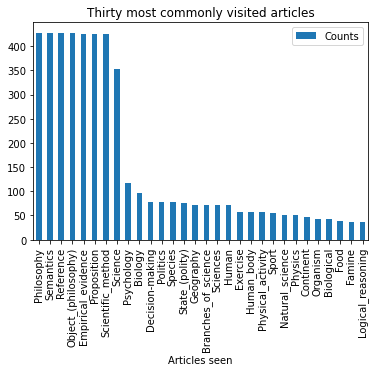

In [84]:
top_visits = article_counts.head(30)
top_visits.plot(kind='bar', x='Articles seen', y='Counts', title='Thirty most commonly visited articles')
plt.show()

#### As show above, routes very often go:
 
##### Science > Scientific_method > Empirical_evidence > Proposition > Semantics > Reference > Object_(philosophy) > Philosophy
 
#### So removing the above results produces the following:

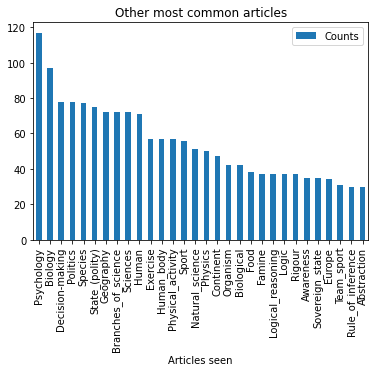

In [85]:
other_top_visits = article_counts.tail(-8).head(30)
other_top_visits.plot(kind='bar', x='Articles seen', y='Counts',title="Other most common articles")
plt.show()

In [80]:
# this finds the number of articles in each search
list_of_counts = []
list_of_counts = [len(only_philosophy[i].unique()) for i in range(len(only_philosophy.columns))]
                             # the max possible value = no. of rows
list_of_counts = [i-1 if i < len(only_philosophy) else i for i in list_of_counts] # removes the "nan"s
list_of_counts = [i-1 for i in list_of_counts] # -1 as not to include the first article
                                                        
print(f"Avg. clicks an article is away from Philosophy: {round(np.average(list_of_counts),2)}")
print(f"Longest link chain: {max(list_of_counts)}")
print(f"Shortest link chain: {min(list_of_counts)}")

Avg. clicks an article is away from Philosophy: 16.69
Longest link chain: 31
Shortest link chain: 2


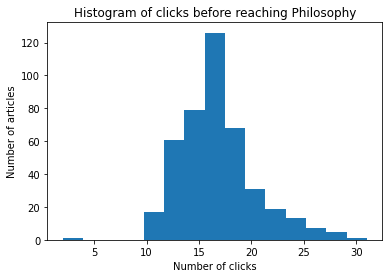

In [86]:
plt.hist(list_of_counts,bins=15)
plt.title('Histogram of clicks before reaching Philosophy')
plt.xlabel("Number of clicks")
plt.ylabel("Number of articles")
plt.show()

Total routes ending in Philosophy: 428, or 85.77%
Total routes ending in loops: 53, or 10.62%
Total routes ending in invalid links: 19, or 3.81%


Text(0.5, 1.0, 'Final outcome of wikipedia searches')

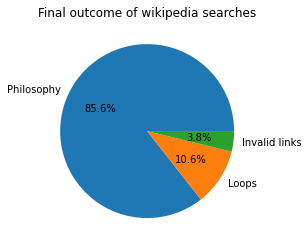

In [90]:
philcount = [i for i in results if "Philosophy" in results[i].values]
loopcount = [i for i in results if "*loop*" in results[i].values]
invalidcount = [i for i in results if "*invalid link*" in results[i].values]

print(f"Total routes ending in Philosophy: {len(philcount)}, or {round(len(philcount)/499*100,2)}%")
print(f"Total routes ending in loops: {len(loopcount)}, or {round(len(loopcount)/499*100,2)}%")
print(f"Total routes ending in invalid links: {len(invalidcount)}, or {round(len(invalidcount)/499*100,2)}%")

plt.figure(facecolor='white')
plt.pie([len(philcount)/499*100,len(loopcount)/499*100,len(invalidcount)/499*100],labels = ["Philosophy","Loops","Invalid links"],autopct='%1.1f%%')
plt.title("Final outcome of wikipedia searches")